# Imports de las librerias usadas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
import datetime

# Leer datasets

In [2]:
dataframe = pd.read_csv("dataset_usernames_corrected.csv")

dataframe['DateTime']= pd.to_datetime(dataframe['DateTime'])
dataframe = dataframe.sort_values(by='DateTime')

#print(dataframe.loc[128733:,:].head(1000))

### Cantidad de datos del dataset

In [3]:
dataframe.shape

(145701, 4)

## Visualización
Histograma de la cantidad de records con cada username encontrado en el dataset.

<AxesSubplot:xlabel='Usernames', ylabel='Amount of records'>

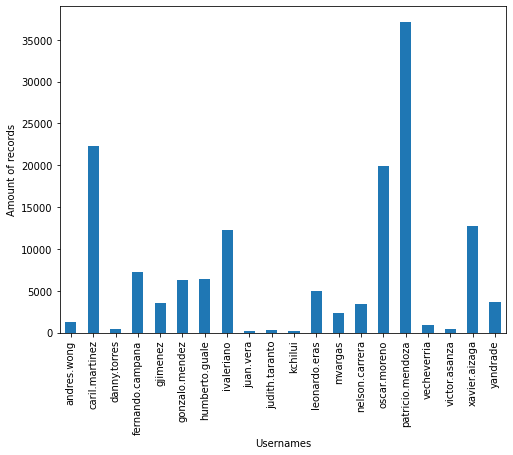

In [4]:
#dataframe.groupby("Username")["Username"].hist(figsize=(20,8),xlabelsize=8)
fig, ax = plt.subplots(figsize=(8,6))
dataframe.groupby("Username")["Username"].count().plot(kind="bar", ax=ax, ylabel="Amount of records", xlabel="Usernames")

Grafos de los usuarios con las Mac Address

In [5]:
from pyvis.network import Network
import matplotlib.pyplot as plt
import networkx as nx

graph_dataframe = dataframe.drop(columns=['DateTime','AccessPoint'])
graph = nx.from_pandas_edgelist(graph_dataframe, source="Username", target="MacAddress")


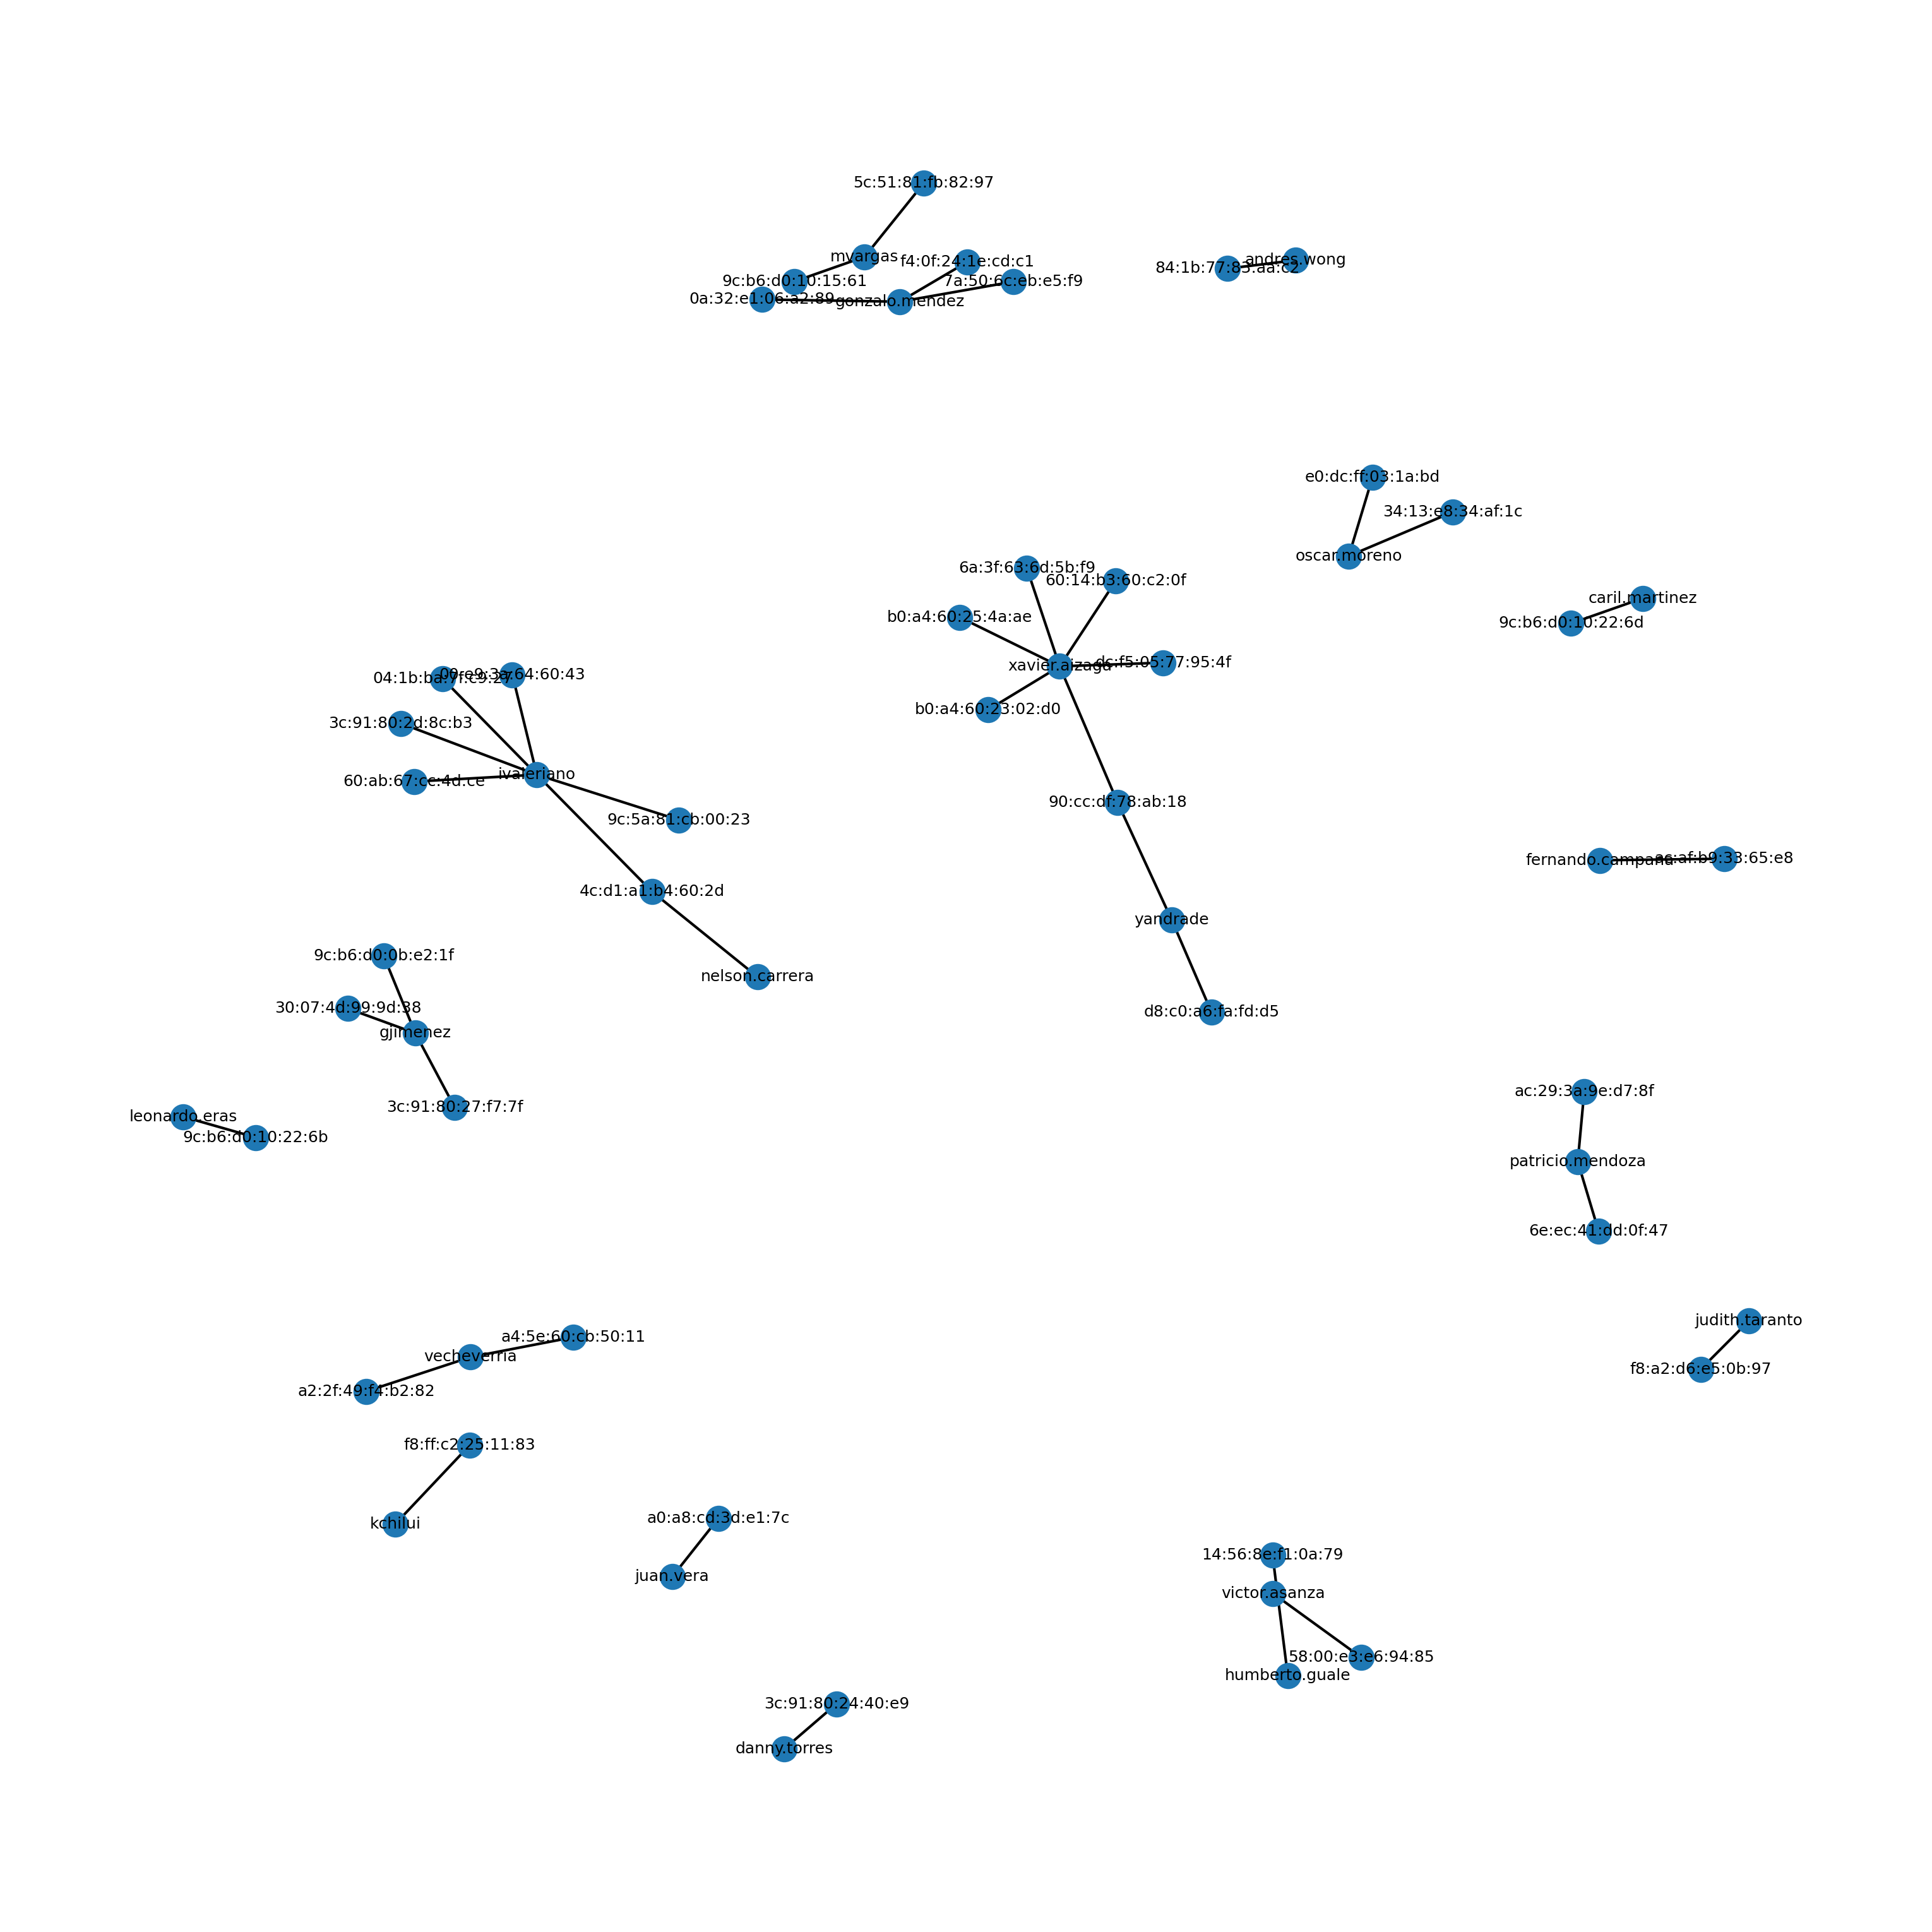

In [91]:
plt.figure(1,figsize=(10,10),dpi=300)
#nx.draw(graph,node_size=50,font_size=3,  with_labels=True,linewidths=0.25, pos=nx.spring_layout(graph))
nx.draw(graph,node_size=80,font_size=6,  with_labels=True, pos=nx.spring_layout(graph,k=0.15, iterations=30))


Grafo interactivo en html

In [92]:
net  = Network(notebook=True)
net.from_nx(graph)
net.show("graph_usernames_corrected.html")

# Algoritmo Apriori

## Creación de records para creación de modelo
Para poder entrenar el modelo y obtener resultados debemos crear conjuntos de elementos que tendran esta asociacion implicita. Como nosotros queremos encontrar asociación entre la Mac Address y el Username de los clientes, dejamos estas dos columnas para su análisis. En caso de querer encontrar mas asociaciones podriamos dejar mas información como el AP al que esta conectado.

In [6]:
df = dataframe.groupby([dataframe['DateTime'].dt.date]).mean()["DateTime"]
print(df)

DateTime
2021-10-17   2021-10-17 23:41:36.028168960
2021-10-18   2021-10-18 08:32:25.843478272
2021-10-19   2021-10-19 18:12:25.218434304
2021-10-20   2021-10-20 09:40:48.550530816
2021-10-21   2021-10-21 09:45:14.959881472
2021-10-22   2021-10-22 09:33:19.974117120
2021-10-23   2021-10-23 00:41:08.888888832
2021-10-24   2021-10-24 23:03:26.276190464
2021-10-25   2021-10-25 04:56:22.501264640
2021-10-26   2021-10-26 14:59:13.760431360
2021-10-27   2021-10-27 12:46:34.558976000
2021-10-28   2021-10-28 10:34:32.750263296
2021-10-29   2021-10-29 09:29:04.681672192
2021-11-03   2021-11-03 18:49:27.449137920
2021-11-04   2021-11-04 10:18:05.795346176
2021-11-05   2021-11-05 18:05:55.920935424
2021-11-06   2021-11-06 07:42:03.287823104
2021-11-07   2021-11-07 08:44:56.390890752
2021-11-08   2021-11-08 11:13:30.297093888
2021-11-09   2021-11-09 10:54:09.718451200
2021-11-11   2021-11-11 10:20:45.997792512
2021-11-15   2021-11-15 18:54:16.192916736
2021-11-16   2021-11-16 09:21:05.145576192
20

C:\Users\JTPC\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

df_section1 = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_end)]
df_section1

,DateTime,Username,MacAddress,AccessPoint
142,2021-10-18 00:00:03,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
143,2021-10-18 00:00:03,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
144,2021-10-18 00:00:34,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
145,2021-10-18 00:00:34,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
146,2021-10-18 00:01:05,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
...,...,...,...,...
6666,2021-10-19 23:59:21,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
6667,2021-10-19 23:59:21,patricio.mendoza,ac:29:3a:9e:d7:8f,Domo_Teleco2
6668,2021-10-19 23:59:51,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
6669,2021-10-19 23:59:51,patricio.mendoza,ac:29:3a:9e:d7:8f,Domo_Teleco2


In [95]:
date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("22/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

df_section2 = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_end)]
df_section2

,DateTime,Username,MacAddress,AccessPoint
142,2021-10-18 00:00:03,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
143,2021-10-18 00:00:03,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
144,2021-10-18 00:00:34,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
145,2021-10-18 00:00:34,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
146,2021-10-18 00:01:05,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
...,...,...,...,...
19556,2021-10-21 23:53:23,patricio.mendoza,ac:29:3a:9e:d7:8f,Domo_Teleco2
19555,2021-10-21 23:53:23,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
19558,2021-10-21 23:57:53,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
19559,2021-10-21 23:57:53,patricio.mendoza,ac:29:3a:9e:d7:8f,Domo_Teleco2


Total Records

In [96]:
df_records_total = dataframe.drop(columns=['DateTime','AccessPoint'])

records_total = df_records_total.to_records(index=False)

print(list(records_total)[:30])

[('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:

Section Records

In [22]:
df_records_section1 = df_section1.drop(columns=['DateTime','AccessPoint'])

record_section1 = df_records_section1.to_records(index=False)

print(list(record_section1)[:30])

[('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:

In [98]:

df_records_section2 = df_section2.drop(columns=['DateTime','AccessPoint'])

record_section2 = df_records_section2.to_records(index=False)

print(list(record_section1)[:30])

[('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:

## Ejecución del algoritmo
A partir de la información organizada ingresamos el algoritmo que ira aprendiendo y generando reglas de asociación para las instancias que encuentra. Luego recorremos estas reglas y las mostramos por consola.

In [8]:
#Funcion para imprimir las reglas
def printRules(lista):
    for item in lista:
        pair = item[0]
        items = [x for x in pair]
        print("Rule: "+ items[0] + " -> "+items[1])
        print("Support: "+ str(item[1])) #Individual popularity (ItemA/TotalTransactions)
        print("Confidence: "+str(item[2][0][2])) #Item A Will include more profit for item B (Item (A+B)/Item (A))
        print("Lift: " + str(item[2][0][3])) #How much Item A includes profit in item B (Confidence/Support)
        print("========================================")


#Funcion para crear un dataset de reglas
def dataframeRules(lista):
    dataset = []
    for item in lista:
        pair = item[0]
        items = [x for x in pair]
        if(":" in items[0] ):
            dataset.append([items[0],items[1],item[1],item[2][0][2],item[2][0][3]])
        else:
            dataset.append([items[1],items[0],item[1],item[2][0][2],item[2][0][3]])
    return pd.DataFrame(dataset,columns=["A","B","Support","Confidence","Lift"])

Ejecución de algoritmo en el dataset completo:

In [100]:
association_rules_total = apriori(records_total, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
association_results_total = list(association_rules_total)
dataframe_rules_total = dataframeRules(association_results_total)
dataframe_rules_total
dataframe_rules_total.to_csv("association_rules.csv", index=False)

#print(association_results_total[0])
#printRules(association_results_total)

Grafo de las reglas de asociación creadas

In [101]:
from pyvis.network import Network
import matplotlib.pyplot as plt
import networkx as nx

graph_ar_dataframe = dataframe_rules_total.drop(columns=['Support','Confidence','Lift'])
graph_ar = nx.from_pandas_edgelist(graph_ar_dataframe, source="A", target="B")
net  = Network(notebook=True)
net.from_nx(graph_ar)
net.show("graph_association_rules.html")

Algoritmo en seccion 1:

In [23]:
association_rules_section1 = apriori(record_section1, min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)
association_results_section1 = list(association_rules_section1)
dataframe_rules_section1 = dataframeRules(association_results_section1)
dataframe_rules_section1
#printRules(association_results_section1)
#dataframe_rules_section1 = dataframeRules(association_results_section1).set_index("A")
#dataframe_rules_section1

,A,B,Support,Confidence,Lift
0,3c:91:80:2d:8c:b3,ivaleriano,0.047634,1.0,6.822362
1,4c:d1:a1:b4:60:2d,ivaleriano,0.023587,1.0,6.822362
2,6a:3f:63:6d:5b:f9,xavier.aizaga,0.005973,1.0,167.410256
3,84:1b:77:83:aa:c2,andres.wong,0.094961,1.0,10.530645
4,9c:5a:81:cb:00:23,ivaleriano,0.075356,1.0,6.822362
5,9c:b6:d0:10:22:6d,caril.martinez,0.274315,1.0,3.645449
6,ac:29:3a:9e:d7:8f,patricio.mendoza,0.114719,1.0,8.716956
7,ac:af:b9:33:65:e8,fernando.campana,0.274315,1.0,3.645449
8,e0:dc:ff:03:1a:bd,oscar.moreno,0.080717,1.0,12.388994


Algoritmo en sección 2:
Incrementado, sección anterior y nueva.

In [24]:
association_rules_section2 = apriori(record_section1, min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)
association_results_section2 = list(association_rules_section2)
association_results_section2
dataframe_rules_section2 = dataframeRules(association_results_section2)
#dataframe_rules_section2
#printRules(association_results_section1)

## Actualización de información

Función:

In [26]:
def updateRules(lastRules, newRules):
    total_indexes = lastRules.index
    updated_dataframe_rules = lastRules
    for mac in newRules.index:
        if mac not in total_indexes:
            updated_dataframe_rules = updated_dataframe_rules.append(newRules.loc[mac])
        elif lastRules.loc[mac]["B"] != newRules.loc[mac]["B"]:
            updated_dataframe_rules = updated_dataframe_rules.drop(mac)
            updated_dataframe_rules = updated_dataframe_rules.append(newRules.loc[mac])
    return updated_dataframe_rules

Uso de la función y almacenamiento en archivo csv.

In [28]:
new_association_rules =  updateRules(dataframe_rules_section1,dataframe_rules_section2)
new_association_rules
#new_association_rules.to_csv("association_rules.csv")


,A,B,Support,Confidence,Lift
0,3c:91:80:2d:8c:b3,ivaleriano,0.047634,1.0,6.822362
1,4c:d1:a1:b4:60:2d,ivaleriano,0.023587,1.0,6.822362
2,6a:3f:63:6d:5b:f9,xavier.aizaga,0.005973,1.0,167.410256
3,84:1b:77:83:aa:c2,andres.wong,0.094961,1.0,10.530645
4,9c:5a:81:cb:00:23,ivaleriano,0.075356,1.0,6.822362
5,9c:b6:d0:10:22:6d,caril.martinez,0.274315,1.0,3.645449
6,ac:29:3a:9e:d7:8f,patricio.mendoza,0.114719,1.0,8.716956
7,ac:af:b9:33:65:e8,fernando.campana,0.274315,1.0,3.645449
8,e0:dc:ff:03:1a:bd,oscar.moreno,0.080717,1.0,12.388994


In [30]:
updateRules(dataframe_rules_section1,dataframe_rules_section2)

,A,B,Support,Confidence,Lift
0,3c:91:80:2d:8c:b3,ivaleriano,0.047634,1.0,6.822362
1,4c:d1:a1:b4:60:2d,ivaleriano,0.023587,1.0,6.822362
2,6a:3f:63:6d:5b:f9,xavier.aizaga,0.005973,1.0,167.410256
3,84:1b:77:83:aa:c2,andres.wong,0.094961,1.0,10.530645
4,9c:5a:81:cb:00:23,ivaleriano,0.075356,1.0,6.822362
5,9c:b6:d0:10:22:6d,caril.martinez,0.274315,1.0,3.645449
6,ac:29:3a:9e:d7:8f,patricio.mendoza,0.114719,1.0,8.716956
7,ac:af:b9:33:65:e8,fernando.campana,0.274315,1.0,3.645449
8,e0:dc:ff:03:1a:bd,oscar.moreno,0.080717,1.0,12.388994


Prueba de efectividad

In [31]:
date_start = datetime.datetime.strptime("22/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("8/12/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

df_section3 = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_end)]
df_section3

,DateTime,Username,MacAddress,AccessPoint
19561,2021-10-22 00:02:23,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
19562,2021-10-22 00:02:23,patricio.mendoza,ac:29:3a:9e:d7:8f,Domo_Teleco2
19563,2021-10-22 00:02:23,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
19564,2021-10-22 00:06:53,patricio.mendoza,ac:29:3a:9e:d7:8f,Domo_Teleco2
19565,2021-10-22 00:06:53,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
...,...,...,...,...
124505,2021-12-07 16:09:06,xavier.aizaga,6a:3f:63:6d:5b:f9,Admin_Tec
124506,2021-12-07 16:09:06,ivaleriano,9c:5a:81:cb:00:23,Admin_Tec
124507,2021-12-07 16:09:06,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
124508,2021-12-07 16:09:06,patricio.mendoza,ac:29:3a:9e:d7:8f,Domo_Teleco2


Tomamos las reglas generadas con las secciones 1,2 (18 al 22 de octubre del 2021) y realizamos pruebas con la sección 3 (22 de octubre al 8 de diciembre) para obtener el porcentaje de asociaciones correcta que realiza. (La seccion 1 y 2 es muy pequeña a comparación de la seccion 3).

In [32]:
igual = 0
total = 0
for row in df_section3.values:    
    username_dataset = row[1]
    username_rule = dataframe_rules_section2.loc[dataframe_rules_section2['A'] == row[2]]["B"]
    if( username_rule.size != 0):
        if(username_dataset == username_rule.iloc[0]):
            igual+=1
    total += 1

print("Valor total de registros: "+ str(total))
print("Valor total de asociados correctamente: "+ str(igual))
print("Porcentaje de asociados correctamente: "+ str(igual*100/total))
    

Valor total de registros: 104949
Valor total de asociados correctamente: 59696
Porcentaje de asociados correctamente: 56.880961228787314


Ahora realizamos la misma prueba con el dataset, usamos las reglas generadas con todo el dataset y sacamos el porcentajes de asociaciones correctas.

In [ ]:
igual = 0
total = 0
for row in df_section3.values:    
    username_dataset = row[1]
    username_rule = dataframe_rules_total.loc[dataframe_rules_total['A'] == row[2]]["B"]
    if( username_rule.size != 0):
        if(username_dataset == username_rule.iloc[0]):
            igual+=1
    total += 1

print("Valor total de registros: "+ str(total))
print("Valor total de asociados correctamente: "+ str(igual))
print("Porcentaje de asociados correctamente: "+ str(igual*100/total))

Valor total de registros: 104949
Valor total de asociados correctamente: 104669
Porcentaje de asociados correctamente: 99.73320374658168


Creamos dos nuevas secciones donde la una sea mas representativa que la otra.

Seccion 5 del 17 de octubre al 4 de diciembre del 2021: 

In [ ]:
date_start = datetime.datetime.strptime("17/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("4/12/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

df_section5 = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_end)]
df_section5

df_records_section5 = df_section5.drop(columns=['DateTime','AccessPoint'])
record_section5 = df_records_section5.to_records(index=False)

print(df_section5.shape)

association_rules_section5 = apriori(record_section5, min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)
association_results_section5 = list(association_rules_section5)
dataframe_rules_section5 = dataframeRules(association_results_section5)
dataframe_rules_section5


(100728, 4)


,A,B,Support,Confidence,Lift
0,04:1b:ba:7f:c9:27,ivaleriano,0.020570,1.000000,10.294124
1,0a:32:e1:06:a2:89,gonzalo.mendez,0.018644,1.000000,15.940497
2,14:56:8e:f1:0a:79,humberto.guale,0.044824,1.000000,22.309635
3,30:07:4d:99:9d:38,gjimenez,0.005808,1.000000,128.808184
4,34:13:e8:34:af:1c,oscar.moreno,0.083959,1.000000,9.665867
5,3c:91:80:2d:8c:b3,ivaleriano,0.026011,1.000000,10.294124
6,4c:d1:a1:b4:60:2d,nelson.carrera,0.021285,0.871899,40.962993
7,6a:3f:63:6d:5b:f9,xavier.aizaga,0.026487,1.000000,13.676578
8,6e:ec:41:dd:0f:47,patricio.mendoza,0.007803,1.000000,3.636259
9,7a:50:6c:eb:e5:f9,gonzalo.mendez,0.020670,1.000000,15.940497


Sección 6 del 4 de diciembre al 8 de diciembre del 2021

In [ ]:
date_start = datetime.datetime.strptime("4/12/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("8/12/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

df_section6 = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_end)]
df_section6

,DateTime,Username,MacAddress,AccessPoint
90802,2021-12-04 00:00:27,oscar.moreno,34:13:e8:34:af:1c,Domo_Teleco2
90803,2021-12-04 00:00:27,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
90804,2021-12-04 00:00:27,patricio.mendoza,ac:29:3a:9e:d7:8f,Domo_Teleco2
90805,2021-12-04 00:00:59,oscar.moreno,34:13:e8:34:af:1c,Domo_Teleco2
90806,2021-12-04 00:00:59,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
...,...,...,...,...
140607,2021-12-07 13:20:54,humberto.guale,14:56:8e:f1:0a:79,TEA_TAI
140608,2021-12-07 14:23:53,xavier.aizaga,6a:3f:63:6d:5b:f9,Data_Center
140609,2021-12-07 14:24:24,xavier.aizaga,6a:3f:63:6d:5b:f9,Lobby
140610,2021-12-07 14:24:56,xavier.aizaga,6a:3f:63:6d:5b:f9,Lobby


Nuevamente sacamos los valores de porcentaje

In [ ]:
igual = 0
total = 0
for row in df_section6.values:    
    username_dataset = row[1]
    username_rule = dataframe_rules_section5.loc[dataframe_rules_section5['A'] == row[2]]["B"]
    if( username_rule.size != 0):
        if(username_dataset == username_rule.iloc[0]):
            igual+=1
    total += 1

print("Valor total de registros: "+ str(total))
print("Valor total de asociados correctamente: "+ str(igual))
print("Porcentaje de asociados correctamente: "+ str(igual*100/total))

Valor total de registros: 23782
Valor total de asociados correctamente: 23681
Porcentaje de asociados correctamente: 99.5753090572702


In [ ]:
def getOnlyUsername(word):
    if "\\" in word:
        username = word.split("\\")[1]
    elif "@" in word:
        username = word.split("@")[0]
    else: 
        username = word
    return username



In [15]:
def pruebaEfectividad(df_section, df_rules):
    igual = 0
    total = 0
    for row in df_section.values:    
        username_dataset = row[1]
        username_rule = df_rules.loc[df_rules['A'] == row[2]]["B"]
        if( username_rule.size != 0):
            if(username_dataset == username_rule.iloc[0]):
                igual+=1
        total += 1

    print("Valor total de registros: "+ str(total))
    print("Valor total de asociados correctamente: "+ str(igual))
    print("Porcentaje de asociados correctamente: "+ str(igual*100/total))

# Pruebas

In [9]:
#Lectura del dataset
dataframe = pd.read_csv("dataset_usernames_corrected.csv")

dataframe['DateTime']= pd.to_datetime(dataframe['DateTime'])
dataframe.sort_values(by='DateTime')
length, columns = dataframe.shape
print("Cantidad de registros:",length)
#dataframe.head()

Cantidad de registros: 145701


## Prueba 1
La primera prueba se ejecutó tomando en cuenta el 20% del dataset para la creación de reglas de asociación y el otro 80% para hacer el test de estas reglas.

In [10]:
#Creación de secciones

#date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
#date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

train = round(length * 0.2)

df_sectionTrain = dataframe.loc[:train,:]
#df_sectionTrain

df_records_sectionTrain = df_sectionTrain.drop(columns=['DateTime','AccessPoint'])
records_sectionTrain = df_records_sectionTrain.to_records(index=False)

#print(list(records_sectionTrain)[:30])

timeStart = datetime.datetime.now()
association_rules_Train = apriori(records_sectionTrain, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
timeEnd = datetime.datetime.now()
deltaTime = (timeEnd - timeStart).microseconds
print("Segundos transcurridos en la ejecución del algoritmo:",deltaTime)

Segundos transcurridos en la ejecución del algoritmo: 0


In [11]:
#Cantidad de reglas
association_results_train = list(association_rules_Train)
dataframe_rules_train= dataframeRules(association_results_train)
print("Cantidad de reglas creadas:",dataframe_rules_train.shape)
#print(association_results_total[0])
#printRules(association_results_total)


Cantidad de reglas creadas: (24, 5)


In [16]:
#Prueba de efectividad de las reglas.
dataframe_test = dataframe.loc[train:,:]
pruebaEfectividad(dataframe_test,dataframe_rules_train)

Valor total de registros: 116561
Valor total de asociados correctamente: 88420
Porcentaje de asociados correctamente: 75.85727644752534


## Prueba 2
La primera prueba se ejecutó tomando en cuenta el 50% del dataset para la creación de reglas de asociación y el otro 50% para hacer el test de estas reglas.

In [17]:
#Creación de secciones

#date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
#date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

train = round(length * 0.5)


df_sectionTrain = dataframe.loc[:train,:]
#df_sectionTrain

df_records_sectionTrain = df_sectionTrain.drop(columns=['DateTime','AccessPoint'])
records_sectionTrain = df_records_sectionTrain.to_records(index=False)

#print(list(records_sectionTrain)[:30])

timeStart = datetime.datetime.now()
association_rules_Train = apriori(records_sectionTrain, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
timeEnd = datetime.datetime.now()
deltaTime = (timeEnd - timeStart).microseconds
print("Segundos transcurridos en la ejecución del algoritmo:",deltaTime)

Segundos transcurridos en la ejecución del algoritmo: 0


In [18]:
#Cantidad de reglas
association_results_train = list(association_rules_Train)
dataframe_rules_train= dataframeRules(association_results_train)
print("Cantidad de reglas creadas:",dataframe_rules_train.shape)
#print(association_results_total[0])
#printRules(association_results_total)

Cantidad de reglas creadas: (27, 5)


In [19]:
#Prueba de efectividad de las reglas.
dataframe_test = dataframe.loc[train:,:]
pruebaEfectividad(dataframe_test,dataframe_rules_train)

Valor total de registros: 72851
Valor total de asociados correctamente: 66846
Porcentaje de asociados correctamente: 91.75714815170691


## Prueba 3
La primera prueba se ejecutó tomando en cuenta el 70% del dataset para la creación de reglas de asociación y el otro 30% para hacer el test de estas reglas.

In [33]:
#Creación de secciones

#date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
#date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

train = round(length * 0.7)


df_sectionTrain = dataframe.loc[:train,:]
#df_sectionTrain

df_records_sectionTrain = df_sectionTrain.drop(columns=['DateTime','AccessPoint'])
records_sectionTrain = df_records_sectionTrain.to_records(index=False)

#print(list(records_sectionTrain)[:30])

timeStart = datetime.datetime.now()
association_rules_Train = apriori(records_sectionTrain, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
timeEnd = datetime.datetime.now()
deltaTime = (timeEnd - timeStart).microseconds
print("Segundos transcurridos en la ejecución del algoritmo:",deltaTime)

Segundos transcurridos en la ejecución del algoritmo: 0


In [34]:
#Cantidad de reglas
association_results_train = list(association_rules_Train)
dataframe_rules_train= dataframeRules(association_results_train)
print("Cantidad de reglas creadas:",dataframe_rules_train.shape)
#print(association_results_total[0])
#printRules(association_results_total)

Cantidad de reglas creadas: (30, 5)


In [35]:
#Prueba de efectividad de las reglas.
dataframe_test = dataframe.loc[train:,:]
pruebaEfectividad(dataframe_test,dataframe_rules_train)

Valor total de registros: 43710
Valor total de asociados correctamente: 39448
Porcentaje de asociados correctamente: 90.24937085335164


## Prueba 4
La primera prueba se ejecutó tomando en cuenta el 80% del dataset para la creación de reglas de asociación y el otro 20% para hacer el test de estas reglas.

In [36]:
#Creación de secciones

#date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
#date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

train = round(length * 0.8)


df_sectionTrain = dataframe.loc[:train,:]
#df_sectionTrain

df_records_sectionTrain = df_sectionTrain.drop(columns=['DateTime','AccessPoint'])
records_sectionTrain = df_records_sectionTrain.to_records(index=False)

#print(list(records_sectionTrain)[:30])

timeStart = datetime.datetime.now()
association_rules_Train = apriori(records_sectionTrain, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
timeEnd = datetime.datetime.now()
deltaTime = (timeEnd - timeStart).microseconds
print("Segundos transcurridos en la ejecución del algoritmo:",deltaTime)

Segundos transcurridos en la ejecución del algoritmo: 0


In [37]:
#Cantidad de reglas
association_results_train = list(association_rules_Train)
dataframe_rules_train= dataframeRules(association_results_train)
print("Cantidad de reglas creadas:",dataframe_rules_train.shape)
#print(association_results_total[0])
#printRules(association_results_total)

Cantidad de reglas creadas: (28, 5)


In [38]:
#Prueba de efectividad de las reglas.
dataframe_test = dataframe.loc[train:,:]
pruebaEfectividad(dataframe_test,dataframe_rules_train)

Valor total de registros: 29140
Valor total de asociados correctamente: 24878
Porcentaje de asociados correctamente: 85.37405628002746


## Prueba 5
La primera prueba se ejecutó tomando en cuenta el 95% del dataset para la creación de reglas de asociación y el otro 5% para hacer el test de estas reglas.

In [39]:
#Creación de secciones

#date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
#date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

train = round(length * 0.95)


df_sectionTrain = dataframe.loc[:train,:]
print(df_sectionTrain)

df_records_sectionTrain = df_sectionTrain.drop(columns=['DateTime','AccessPoint'])
records_sectionTrain = df_records_sectionTrain.to_records(index=False)

#print(list(records_sectionTrain)[:30])

timeStart = datetime.datetime.now()
association_rules_Train = apriori(records_sectionTrain, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
timeEnd = datetime.datetime.now()
deltaTime = (timeEnd - timeStart).microseconds
print("Segundos transcurridos en la ejecución del algoritmo:",deltaTime)

                  DateTime          Username         MacAddress   AccessPoint
0      2021-10-17 23:23:39    caril.martinez  9c:b6:d0:10:22:6d  Domo_Teleco2
1      2021-10-17 23:23:39  fernando.campana  ac:af:b9:33:65:e8  Domo_Teleco1
2      2021-10-17 23:24:10    caril.martinez  9c:b6:d0:10:22:6d  Domo_Teleco2
3      2021-10-17 23:24:10  fernando.campana  ac:af:b9:33:65:e8  Domo_Teleco1
4      2021-10-17 23:24:41    caril.martinez  9c:b6:d0:10:22:6d  Domo_Teleco2
...                    ...               ...                ...           ...
138412 2021-12-13 14:39:55    nelson.carrera  4c:d1:a1:b4:60:2d         Lobby
138413 2021-12-13 14:39:55          gjimenez  9c:b6:d0:0b:e2:1f       TEA_TAI
138414 2021-12-13 14:40:28    nelson.carrera  4c:d1:a1:b4:60:2d         Lobby
138415 2021-12-13 14:40:28          gjimenez  9c:b6:d0:0b:e2:1f       TEA_TAI
138416 2021-12-13 14:41:18          gjimenez  9c:b6:d0:0b:e2:1f       TEA_TAI

[138417 rows x 4 columns]
Segundos transcurridos en la ejecució

In [40]:
#Cantidad de reglas
association_results_train = list(association_rules_Train)
dataframe_rules_train= dataframeRules(association_results_train)
print("Cantidad de reglas creadas:",dataframe_rules_train.shape)
#print(association_results_total[0])
#printRules(association_results_total)

Cantidad de reglas creadas: (30, 5)


In [41]:
#Prueba de efectividad de las reglas.
dataframe_test = dataframe.loc[train:,:]
print(dataframe_test)
pruebaEfectividad(dataframe_test,dataframe_rules_train)

                  DateTime          Username         MacAddress   AccessPoint
138416 2021-12-13 14:41:18          gjimenez  9c:b6:d0:0b:e2:1f       TEA_TAI
138417 2021-12-13 14:41:18    nelson.carrera  4c:d1:a1:b4:60:2d         Lobby
138418 2021-12-13 14:41:51          gjimenez  9c:b6:d0:0b:e2:1f       TEA_TAI
138419 2021-12-13 14:41:51    nelson.carrera  4c:d1:a1:b4:60:2d         Lobby
138420 2021-12-13 14:42:24    nelson.carrera  4c:d1:a1:b4:60:2d         Lobby
...                    ...               ...                ...           ...
145696 2021-12-14 17:31:24      oscar.moreno  34:13:e8:34:af:1c  Domo_Teleco2
145697 2021-12-14 17:31:53          gjimenez  9c:b6:d0:0b:e2:1f       TEA_TAI
145698 2021-12-14 17:31:56      oscar.moreno  34:13:e8:34:af:1c  Domo_Teleco2
145699 2021-12-14 17:31:56    caril.martinez  9c:b6:d0:10:22:6d  Domo_Teleco2
145700 2021-12-14 17:31:56  patricio.mendoza  ac:29:3a:9e:d7:8f  Domo_Teleco2

[7285 rows x 4 columns]
Valor total de registros: 7285
Valor to

## Prueba 6
La primera prueba se ejecutó tomando en cuenta el 98% del dataset para la creación de reglas de asociación y el otro 2% para hacer el test de estas reglas.

In [42]:
#Creación de secciones

#date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
#date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

train = round(length * 0.98)


df_sectionTrain = dataframe.loc[:train,:]
#df_sectionTrain

df_records_sectionTrain = df_sectionTrain.drop(columns=['DateTime','AccessPoint'])
records_sectionTrain = df_records_sectionTrain.to_records(index=False)

#print(list(records_sectionTrain)[:30])

timeStart = datetime.datetime.now()
association_rules_Train = apriori(records_sectionTrain, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
timeEnd = datetime.datetime.now()
deltaTime = (timeEnd - timeStart).microseconds
print("Segundos transcurridos en la ejecución del algoritmo:",deltaTime)

Segundos transcurridos en la ejecución del algoritmo: 0


In [43]:
#Cantidad de reglas
association_results_train = list(association_rules_Train)
dataframe_rules_train= dataframeRules(association_results_train)
print("Cantidad de reglas creadas:",dataframe_rules_train.shape)
#print(association_results_total[0])
#printRules(association_results_total)

Cantidad de reglas creadas: (31, 5)


In [44]:
#Prueba de efectividad de las reglas.
dataframe_test = dataframe.loc[train:,:]
pruebaEfectividad(dataframe_test,dataframe_rules_train)

Valor total de registros: 2914
Valor total de asociados correctamente: 2914
Porcentaje de asociados correctamente: 100.0


## Prueba 7
La primera prueba se ejecutó tomando en cuenta el 99% del dataset para la creación de reglas de asociación y el otro 1% para hacer el test de estas reglas.

In [45]:
#Creación de secciones

#date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
#date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

train = round(length * 0.99)


df_sectionTrain = dataframe.loc[:train,:]
#df_sectionTrain

df_records_sectionTrain = df_sectionTrain.drop(columns=['DateTime','AccessPoint'])
records_sectionTrain = df_records_sectionTrain.to_records(index=False)

#print(list(records_sectionTrain)[:30])

timeStart = datetime.datetime.now()
association_rules_Train = apriori(records_sectionTrain, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
timeEnd = datetime.datetime.now()
deltaTime = (timeEnd - timeStart).microseconds
print("Segundos transcurridos en la ejecución del algoritmo:",deltaTime)


#Cantidad de reglas
association_results_train = list(association_rules_Train)
dataframe_rules_train= dataframeRules(association_results_train)
print("Cantidad de reglas creadas:",dataframe_rules_train.shape)
#print(association_results_total[0])
#printRules(association_results_total)

#Prueba de efectividad de las reglas.
dataframe_test = dataframe.loc[train:,:]
pruebaEfectividad(dataframe_test,dataframe_rules_train)

Segundos transcurridos en la ejecución del algoritmo: 0
Cantidad de reglas creadas: (31, 5)
Valor total de registros: 1457
Valor total de asociados correctamente: 1457
Porcentaje de asociados correctamente: 100.0


## Prueba 8
La primera prueba se ejecutó tomando en cuenta el 99.5% del dataset para la creación de reglas de asociación y el otro 0.5% para hacer el test de estas reglas.

In [46]:
#Creación de secciones

#date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
#date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

train = round(length * 0.995)


df_sectionTrain = dataframe.loc[:train,:]
#df_sectionTrain

df_records_sectionTrain = df_sectionTrain.drop(columns=['DateTime','AccessPoint'])
records_sectionTrain = df_records_sectionTrain.to_records(index=False)

#print(list(records_sectionTrain)[:30])

timeStart = datetime.datetime.now()
association_rules_Train = apriori(records_sectionTrain, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
timeEnd = datetime.datetime.now()
deltaTime = (timeEnd - timeStart).microseconds
print("Segundos transcurridos en la ejecución del algoritmo:",deltaTime)

#Cantidad de reglas
association_results_train = list(association_rules_Train)
dataframe_rules_train= dataframeRules(association_results_train)
print("Cantidad de reglas creadas:",dataframe_rules_train.shape)
#print(association_results_total[0])
#printRules(association_results_total)

#Prueba de efectividad de las reglas.
dataframe_test = dataframe.loc[train:,:]
pruebaEfectividad(dataframe_test,dataframe_rules_train)

Segundos transcurridos en la ejecución del algoritmo: 0
Cantidad de reglas creadas: (31, 5)
Valor total de registros: 729
Valor total de asociados correctamente: 729
Porcentaje de asociados correctamente: 100.0


## Pruebas de tiempo

### Prueba 1
sección train: 15 dias de noviembre
sección test: 15 dias restantes de noviembre y diciembre

In [ ]:
#Creación de secciones

#date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
#date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_start = datetime.datetime.strptime("1/11/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_mid = datetime.datetime.strptime("15/11/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("1/1/2022 00:00:00", '%d/%m/%Y %H:%M:%S')


df_sectionTrain = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_mid)]
print(df_sectionTrain.shape)

df_records_sectionTrain = df_sectionTrain.drop(columns=['DateTime','AccessPoint'])
records_sectionTrain = df_records_sectionTrain.to_records(index=False)

#print(list(records_sectionTrain)[:30])

timeStart = datetime.datetime.now()
association_rules_Train = apriori(records_sectionTrain, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
timeEnd = datetime.datetime.now()
deltaTime = (timeEnd - timeStart).microseconds
print("Segundos transcurridos en la ejecución del algoritmo:",deltaTime)

#Cantidad de reglas
association_results_train = list(association_rules_Train)
dataframe_rules_train= dataframeRules(association_results_train)
print("Cantidad de reglas creadas:",dataframe_rules_train.shape)
#print(association_results_total[0])
#printRules(association_results_total)

#Prueba de efectividad de las reglas.
dataframe_test = dataframe[(dataframe['DateTime'] > date_mid) & (dataframe['DateTime'] < date_end)]
pruebaEfectividad(dataframe_test,dataframe_rules_train)

(21315, 4)
Segundos transcurridos en la ejecución del algoritmo: 968
Cantidad de reglas creadas: (19, 5)
Valor total de registros: 75689
Valor total de asociados correctamente: 50768
Porcentaje de asociados correctamente: 67.0744758155082


### Prueba 2
sección train: mes de octubre
sección test: mes de noviembre

In [48]:
#Creación de secciones

#date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
#date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_start = datetime.datetime.strptime("1/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_mid = datetime.datetime.strptime("1/11/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("1/12/2021 00:00:00", '%d/%m/%Y %H:%M:%S')




df_sectionTrain = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_mid)]
print(df_sectionTrain.shape)

df_records_sectionTrain = df_sectionTrain.drop(columns=['DateTime','AccessPoint'])
records_sectionTrain = df_records_sectionTrain.to_records(index=False)

#print(list(records_sectionTrain)[:30])

timeStart = datetime.datetime.now()
association_rules_Train = apriori(records_sectionTrain, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
timeEnd = datetime.datetime.now()
deltaTime = (timeEnd - timeStart).microseconds
print("Segundos transcurridos en la ejecución del algoritmo:",deltaTime)

#Cantidad de reglas
association_results_train = list(association_rules_Train)
dataframe_rules_train= dataframeRules(association_results_train)
print("Cantidad de reglas creadas:",dataframe_rules_train.shape)
#print(association_results_total[0])
#printRules(association_results_total)

#Prueba de efectividad de las reglas.
dataframe_test = dataframe[(dataframe['DateTime'] > date_mid) & (dataframe['DateTime'] < date_end)]
pruebaEfectividad(dataframe_test,dataframe_rules_train)

(48697, 4)
Segundos transcurridos en la ejecución del algoritmo: 2001
Cantidad de reglas creadas: (25, 5)
Valor total de registros: 49011
Valor total de asociados correctamente: 47809
Porcentaje de asociados correctamente: 97.54748933912795


### Prueba 3
sección train: mes de noviembre
sección test: mes de diciembre

In [49]:
#Creación de secciones

#date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
#date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_start = datetime.datetime.strptime("1/11/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_mid = datetime.datetime.strptime("1/12/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("1/1/2022 00:00:00", '%d/%m/%Y %H:%M:%S')




df_sectionTrain = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_mid)]
print(df_sectionTrain.shape)

df_records_sectionTrain = df_sectionTrain.drop(columns=['DateTime','AccessPoint'])
records_sectionTrain = df_records_sectionTrain.to_records(index=False)

#print(list(records_sectionTrain)[:30])

timeStart = datetime.datetime.now()
association_rules_Train = apriori(records_sectionTrain, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
timeEnd = datetime.datetime.now()
deltaTime = (timeEnd - timeStart).microseconds
print("Segundos transcurridos en la ejecución del algoritmo:",deltaTime)

#Cantidad de reglas
association_results_train = list(association_rules_Train)
dataframe_rules_train= dataframeRules(association_results_train)
print("Cantidad de reglas creadas:",dataframe_rules_train.shape)
#print(association_results_total[0])
#printRules(association_results_total)

#Prueba de efectividad de las reglas.
dataframe_test = dataframe[(dataframe['DateTime'] > date_mid) & (dataframe['DateTime'] < date_end)]
pruebaEfectividad(dataframe_test,dataframe_rules_train)

(49011, 4)
Segundos transcurridos en la ejecución del algoritmo: 0
Cantidad de reglas creadas: (26, 5)
Valor total de registros: 47993
Valor total de asociados correctamente: 43646
Porcentaje de asociados correctamente: 90.94242910424437


### Prueba 4
sección train: mes de noviembre y 15 dias de diciembre
sección test: 15 dias restantes de diciembre

In [58]:
#Creación de secciones

#date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
#date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_start = datetime.datetime.strptime("1/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_mid = datetime.datetime.strptime("15/11/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("1/12/2022 00:00:00", '%d/%m/%Y %H:%M:%S')


df_sectionTrain = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_mid)]
print(df_sectionTrain.shape)

df_records_sectionTrain = df_sectionTrain.drop(columns=['DateTime','AccessPoint'])
records_sectionTrain = df_records_sectionTrain.to_records(index=False)

#print(list(records_sectionTrain)[:30])

timeStart = datetime.datetime.now()
association_rules_Train = apriori(records_sectionTrain, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
timeEnd = datetime.datetime.now()
deltaTime = (timeEnd - timeStart).microseconds
print("Segundos transcurridos en la ejecución del algoritmo:",deltaTime)

#Cantidad de reglas
association_results_train = list(association_rules_Train)
dataframe_rules_train= dataframeRules(association_results_train)
print("Cantidad de reglas creadas:",dataframe_rules_train.shape)
#print(association_results_total[0])
#printRules(association_results_total)

#Prueba de efectividad de las reglas.
dataframe_test = dataframe[(dataframe['DateTime'] > date_mid) & (dataframe['DateTime'] < date_end)]
pruebaEfectividad(dataframe_test,dataframe_rules_train)

(70012, 4)
Segundos transcurridos en la ejecución del algoritmo: 0
Cantidad de reglas creadas: (27, 5)
Valor total de registros: 75689
Valor total de asociados correctamente: 69684
Porcentaje de asociados correctamente: 92.06621834084213
